In [1]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import datetime
from datetime import datetime

import re
import string
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter

from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [2]:
df=pd.read_csv('Dabur.csv',encoding='ISO-8859-1')
df.head()

,Date,Text,Username,Like Count,Retweet Count,Follower Count
0,2023-03-27 13:26:01+00:00,#Godrejcp 965.65 from 947\n#Dabur 546 from 536,moneyrain5000k,0.0,0.0,983.0
1,2023-03-27 12:47:27+00:00,Real Masala Mixed Fruit 1L (Pack Of 2)\n\nâ O...,Dealzie_Deals,0.0,0.0,54.0
2,2023-03-27 11:48:11+00:00,Important Intraday Levels for Next Session\nSt...,EagleEyeReview,0.0,1.0,1354.0
3,2023-03-27 09:04:02+00:00,Dabur at breakout level\n\n#dabur https://t.co...,NiranjanGhatule,2.0,1.0,2035.0
4,2023-03-27 08:25:14+00:00,Tchinical Analisys Update #27Mar2023 12:59\nSt...,EagleEyeReview,0.0,0.0,1354.0


In [3]:
df.columns

Index(['Date', 'Text', 'Username', 'Like Count', 'Retweet Count',
       'Follower Count'],
      dtype='object')

In [4]:
# Drop Username column
df.drop('Username',inplace=True,axis=1)

In [5]:
# Check any missing values
df.isnull().sum()

Date                5
Text               26
Like Count        144
Retweet Count     144
Follower Count    144
dtype: int64

In [6]:
for col in df.columns:
    print(col,':',(df[col].isnull().sum()/len(df))*100,'%')

Date : 0.02129199846697611 %
Text : 0.11071839202827577 %
Like Count : 0.613209555848912 %
Retweet Count : 0.613209555848912 %
Follower Count : 0.613209555848912 %


In [7]:
# Drop the missing values as its count is very less compared to the entire dataset
df.dropna(inplace=True)
len(df)

23339

In [8]:
df.isnull().sum()

Date              0
Text              0
Like Count        0
Retweet Count     0
Follower Count    0
dtype: int64

In [9]:
# Count duplicates in the 'column_name' column
duplicates = df.duplicated(subset=['Text'], keep=False)
num_duplicates = duplicates.sum()

# Print the number of duplicates
print(f"There are {num_duplicates} duplicates in the 'Text' column.")

There are 2539 duplicates in the 'Text' column.


In [10]:
# Drop the duplicates
df = df.drop_duplicates(subset='Text')
len(df)

21875

In [11]:
# extract hashtags from the Text column
hashtags = []
for text in df['Text']:
    hashtags += re.findall(r'#\w+', text)

# count the frequency of each hashtag
freq = Counter(hashtags)

# sort the hashtags by frequency
sorted_hashtags = sorted(freq.items(), key=lambda x: x[1], reverse=True)

# extract the top 20 hashtags
top_20_hashtags = sorted_hashtags[:20]

# print the top 20 hashtags with their frequency
for hashtag, count in top_20_hashtags:
    print(f"{hashtag}: {count}")

#Dabur: 5115
#DaburGulabari: 3630
#DABUR: 3462
#AmPrettyTough: 2978
#DaburChyawanprash: 2524
#DaburHoney: 2499
#dabur: 2090
#PWL: 1356
#NimblrTA: 1318
#stocks: 1079
#DaburIndia: 1004
#DaburAmla: 949
#nifty: 890
#nifty50: 863
#investing: 852
#business: 707
#invest: 683
#finance: 673
#StockMarcket: 660
#Financial: 660


In [12]:
# Remove URLs, mentions, and hashtags
def remove_twitter_elements(tweet):
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\@\w+|\#','', tweet)
    return tweet

df['Text'] = df['Text'].apply(remove_twitter_elements)

In [13]:
#removing emojis
def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df['Text'] = df['Text'].apply(remove_emojis)

In [14]:
#removing punctuations
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

df['Text'] = df['Text'].apply(remove_punctuation)

In [15]:
# Remove special characters 
def remove_special_characters(tweet):
    tweet = re.sub('[^a-zA-Z0-9\s]', '', tweet)
    return tweet

df['Text'] = df['Text'].apply(remove_special_characters)

In [16]:
# converting to lowercase
df['Text'] = df['Text'].apply(lambda x: x.lower())

In [17]:
# Tokenize the text
def tokenize(tweet):
    tokens = nltk.word_tokenize(tweet)
    return tokens

df['Text'] = df['Text'].apply(tokenize)

In [18]:
# Remove stop words
def remove_stop_words(tokens):
    stop_words = set(nltk.corpus.stopwords.words('english'))
    stop_words.update(['britannia','amp','im','start','one'])
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

df['Text'] = df['Text'].apply(remove_stop_words)

In [19]:
# Stemming or Lemmatization
def stem_tokens(tokens):
    stemmer = SnowballStemmer('english')
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

df['Text'] = df['Text'].apply(stem_tokens)

In [20]:
# Normalize case
def normalize_case(tokens):
    normalized_tokens = [token.lower() for token in tokens]
    return normalized_tokens

df['Text'] = df['Text'].apply(normalize_case)

In [21]:
# join tokens back into a single string
def join_text(tweet):
    joined_tweet = " ".join(tweet)
    return joined_tweet

df['Text'] = df['Text'].apply(join_text)

In [22]:
# Convert date to extract Year, Month, Day
df['Date']=pd.to_datetime(df['Date'])

df['Year'] = df['Date'].apply(lambda date:date.year)
df['Month'] = df['Date'].apply(lambda date:date.month)
df['Day']=df['Date'].apply(lambda date:date.day)
df['Date'] = df['Date'].dt.date

In [23]:
df.head()

,Date,Text,Like Count,Retweet Count,Follower Count,Year,Month,Day
0,2023-03-27,godrejcp 96565 947 dabur 546 536,0.0,0.0,983.0,2023,3,27
1,2023-03-27,real masala mix fruit 1l pack 2 offer price 14...,0.0,0.0,54.0,2023,3,27
2,2023-03-27,import intraday level next session stock dabur...,0.0,1.0,1354.0,2023,3,27
3,2023-03-27,dabur breakout level dabur,2.0,1.0,2035.0,2023,3,27
4,2023-03-27,tchinic analisi updat 27mar2023 1259 stock dab...,0.0,0.0,1354.0,2023,3,27


In [24]:
df.drop('Tweet Id',inplace=True,axis=1)

KeyError: "['Tweet Id'] not found in axis"

In [25]:
#nltk.download('vader_lexicon')

# initialize VADER
sid = SentimentIntensityAnalyzer()

# define a function to get the sentiment score for each tweet
def get_sentiment_score(text):
    scores = sid.polarity_scores(text)
    return scores['compound']

# apply the function to the 'text' column and create a new 'sentiment_score' column
df['sentiment_score'] = df['Text'].apply(get_sentiment_score)

# print the first 10 rows of the dataframe to verify the results
df.head(10)

,Date,Text,Like Count,Retweet Count,Follower Count,Year,Month,Day,sentiment_score
0,2023-03-27,godrejcp 96565 947 dabur 546 536,0.0,0.0,983.0,2023,3,27,0.0000
1,2023-03-27,real masala mix fruit 1l pack 2 offer price 14...,0.0,0.0,54.0,2023,3,27,0.0000
2,2023-03-27,import intraday level next session stock dabur...,0.0,1.0,1354.0,2023,3,27,0.0000
3,2023-03-27,dabur breakout level dabur,2.0,1.0,2035.0,2023,3,27,0.0000
4,2023-03-27,tchinic analisi updat 27mar2023 1259 stock dab...,0.0,0.0,1354.0,2023,3,27,0.5106
5,2023-03-27,dabur breakout candid close 545 may give good ...,7.0,0.0,1653.0,2023,3,27,0.8176
6,2023-03-27,tchinic analisi updat 27mar2023 0926 stock dab...,1.0,0.0,1354.0,2023,3,27,-0.4404
7,2023-03-27,youtub held liabl unauthor use trademark dabur...,1.0,0.0,2546.0,2023,3,27,0.0000
8,2023-03-27,daili updat 27mar2023 0857 stock dabur open 53...,0.0,0.0,1354.0,2023,3,27,-0.2732
9,2023-03-26,new breakout stocksto short term invest dabur ...,0.0,0.0,583.0,2023,3,26,0.0000


In [26]:
# define a function to map the sentiment scores to categories
def get_sentiment_category(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'
    
# map the sentiment scores to categories and create a new 'category' column
df['Polarity'] = df['sentiment_score'].apply(get_sentiment_category)

# print the first 10 rows of the dataframe to verify the results
df.head(10)

,Date,Text,Like Count,Retweet Count,Follower Count,Year,Month,Day,sentiment_score,Polarity
0,2023-03-27,godrejcp 96565 947 dabur 546 536,0.0,0.0,983.0,2023,3,27,0.0000,neutral
1,2023-03-27,real masala mix fruit 1l pack 2 offer price 14...,0.0,0.0,54.0,2023,3,27,0.0000,neutral
2,2023-03-27,import intraday level next session stock dabur...,0.0,1.0,1354.0,2023,3,27,0.0000,neutral
3,2023-03-27,dabur breakout level dabur,2.0,1.0,2035.0,2023,3,27,0.0000,neutral
4,2023-03-27,tchinic analisi updat 27mar2023 1259 stock dab...,0.0,0.0,1354.0,2023,3,27,0.5106,positive
5,2023-03-27,dabur breakout candid close 545 may give good ...,7.0,0.0,1653.0,2023,3,27,0.8176,positive
6,2023-03-27,tchinic analisi updat 27mar2023 0926 stock dab...,1.0,0.0,1354.0,2023,3,27,-0.4404,negative
7,2023-03-27,youtub held liabl unauthor use trademark dabur...,1.0,0.0,2546.0,2023,3,27,0.0000,neutral
8,2023-03-27,daili updat 27mar2023 0857 stock dabur open 53...,0.0,0.0,1354.0,2023,3,27,-0.2732,negative
9,2023-03-26,new breakout stocksto short term invest dabur ...,0.0,0.0,583.0,2023,3,26,0.0000,neutral


In [27]:
df['Polarity'].value_counts()

positive    11640
neutral      7865
negative     2370
Name: Polarity, dtype: int64

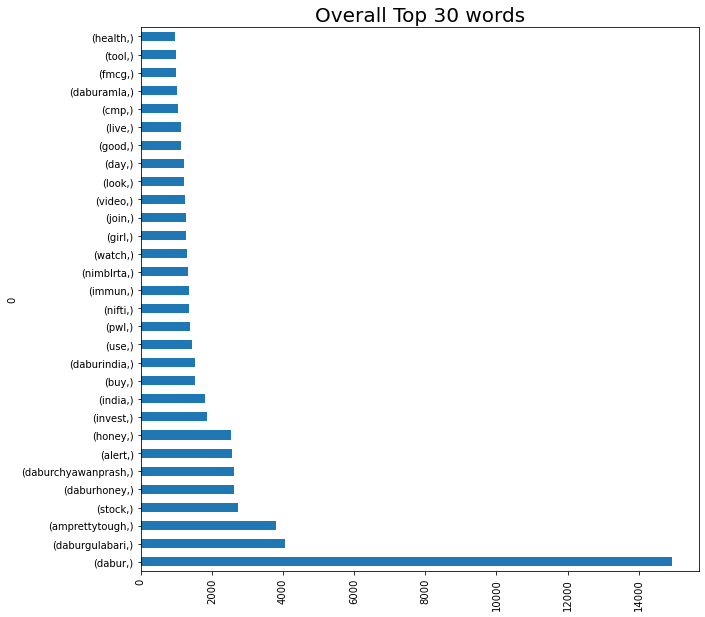

In [69]:
#Overall top 30 words
overall_corpus=[]
for msg in df['Text'].tolist():
    for word in msg.split():
        overall_corpus.append(word)
        
plt.figure(figsize=(10,10))
pd.DataFrame(overall_corpus).value_counts(ascending=False)[0:30].plot(kind='barh')
plt.xticks(rotation='vertical')
plt.title('Overall Top 30 words',size=20)
plt.show()

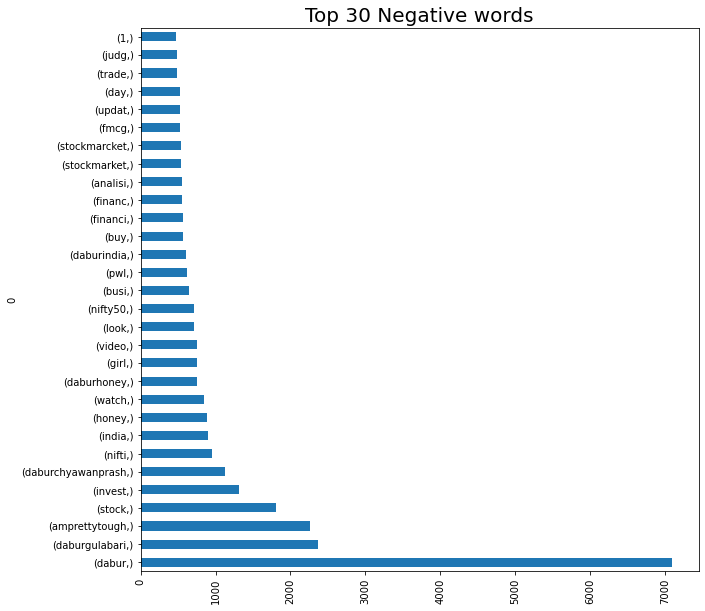

In [70]:
#top negative 30 words
negative_corpus=[]
for msg in df[df['Polarity']=='negative']['Text'].tolist():
    for word in msg.split():
        negative_corpus.append(word)
        
plt.figure(figsize=(10,10))
pd.DataFrame(negative_corpus).value_counts(ascending=False)[0:30].plot(kind='barh')
plt.xticks(rotation='vertical')
plt.title('Top 30 Negative words',size=20)
plt.show()

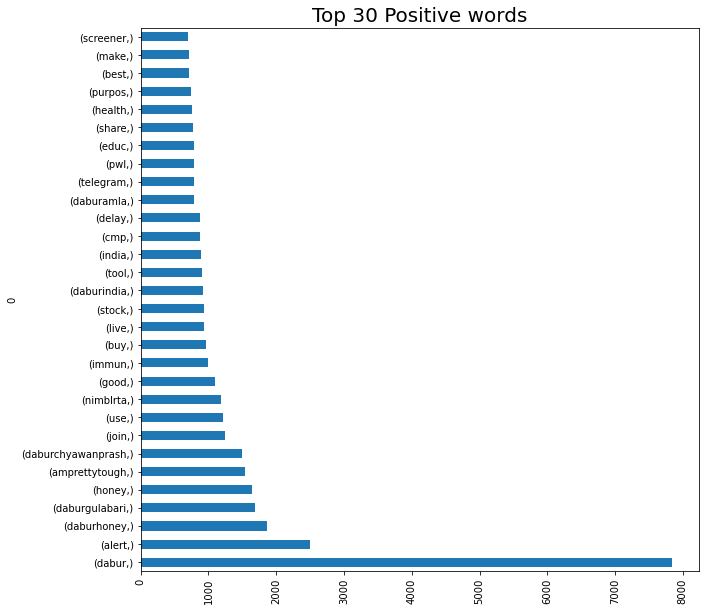

In [72]:
#top positive 30 words
positive_corpus=[]
for msg in df[df['Polarity']=='positive']['Text'].tolist():
    for word in msg.split():
        positive_corpus.append(word)
        
plt.figure(figsize=(10,10))
pd.DataFrame(positive_corpus).value_counts(ascending=False)[0:30].plot(kind='barh')
plt.xticks(rotation='vertical')
plt.title('Top 30 Positive words',size=20)
plt.show()

In [73]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

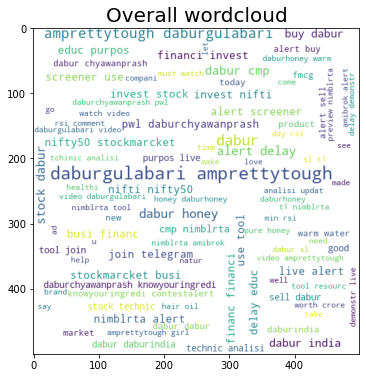

In [74]:
#Overall
overall_wc=wc.generate(df['Text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(overall_wc)
plt.title('Overall wordcloud',fontsize=20)
plt.show()

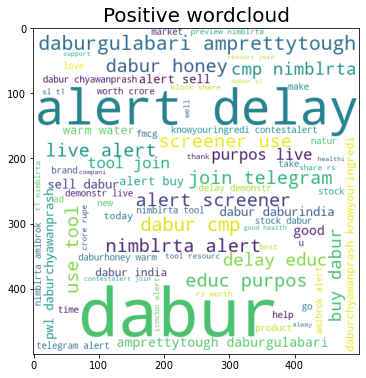

In [75]:
#positive
positive_wc=wc.generate(df[df['Polarity']=='positive']['Text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(positive_wc)
plt.title('Positive wordcloud',fontsize=20)
plt.show()

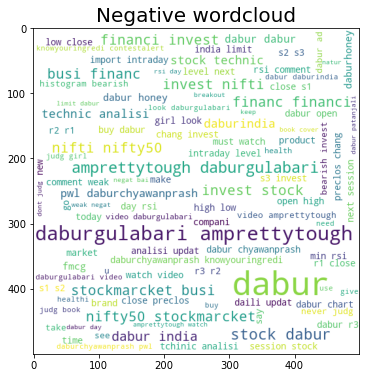

In [76]:
#negative
negative_wc=wc.generate(df[df['Polarity']=='negative']['Text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(negative_wc)
plt.title('Negative wordcloud',fontsize=20)
plt.show()

In [77]:
#neutral
neutral_wc=wc.generate(df[df['polarity']=='neutral']['Text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(neutral_wc)
plt.title('Neutral wordcloud',fontsize=20)
plt.show()

KeyError: 'polarity'

### Wordcloud after eliminating irrelevant terms

In [ ]:
stop_words = set(nltk.corpus.stopwords.words('english'))
stop_words.update(['u','would'])
wordcloud = WordCloud(stopwords=stop_words).generate(df['Text'].str.cat(sep=" "))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.title('Overall wordcloud',fontsize=20)
plt.show()

In [ ]:
stop_words = set(nltk.corpus.stopwords.words('english'))
#stop_words.update(['nestl', 'nestleindia', 'nestleind','amp','rt','morn','rt','morn','one'])
wordcloud = WordCloud(stopwords=stop_words).generate(df[df['Polarity']=='positive']['Text'].str.cat(sep=" "))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.title('Positive wordcloud',fontsize=20)
plt.show()

In [ ]:
stop_words = set(nltk.corpus.stopwords.words('english'))
stop_words.update(['nestl', 'nestleindia','amp','rt','via','camat'])
wordcloud = WordCloud(stopwords=stop_words).generate(df[df['polarity']=='neutral']['Text'].str.cat(sep=" "))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.title('Neutral wordcloud',fontsize=20)
plt.show()

In [ ]:
stop_words = set(nltk.corpus.stopwords.words('english'))
wordcloud = WordCloud(stopwords=stop_words).generate(df[df['Polarity']=='negative']['Text'].str.cat(sep=" "))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.title('Negative wordcloud',fontsize=20)
plt.show()

In [ ]:
# Distribution of tweets over time
plt.figure(figsize=(6,6))
df['Date'].value_counts().plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Number of tweets')
plt.show()

In [ ]:
# Create correlation matrix
corr = df[['Like Count', 'Retweet Count', 'Follower Count', 'Polarity']].corr()

# Create heatmap
sns.heatmap(corr, annot=True)
plt.show()

In [78]:
import pandas as pd
import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize

# Preprocess text data
preprocessed_data = []
for text in df['Text']:
    tokens = word_tokenize(text.lower())
    preprocessed_data.append(tokens)

# Create a dictionary and corpus
dictionary = corpora.Dictionary(preprocessed_data)
corpus = [dictionary.doc2bow(text) for text in preprocessed_data]

# Train the LDA model
num_topics = 1
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

# Print the topics
for topic_id, topic in lda_model.show_topics(num_topics=num_topics, formatted=False):
    print("Topic:", topic_id)
    for word, weight in topic:
        print("\t", word, ":", weight)


Topic: 0
	 daburgulabari : 0.03418597
	 amprettytough : 0.031735145
	 dabur : 0.020556089
	 daburamla : 0.014227404
	 daburchyawanprash : 0.011978452
	 girl : 0.011334961
	 hair : 0.010805244
	 video : 0.009375599
	 watch : 0.008690097
	 loveisbeyondmothersday : 0.008472404


<AxesSubplot:>

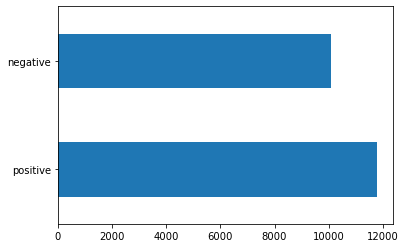

In [79]:
df['Polarity'].value_counts().plot(kind='barh')

### DAILY DATA

In [80]:
# convert the 'date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [81]:
# group the tweets by day and count the number of tweets in each group
tweet_count = df.groupby(df['Date'].dt.date).size().reset_index(name='count')

min = tweet_count.min()[1]
max = tweet_count.max()[1]
mean = tweet_count.mean()[0]

print('Minimum count:',min,' Maximum count:', max,' Mean count:',mean)

Minimum count: 1  Maximum count: 1633  Mean count: 10.932033983008496


C:\Users\HP\AppData\Local\Temp/ipykernel_28232/3200270126.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = tweet_count.mean()[0]


In [82]:
tweet_volume = tweet_count['count']

In [83]:
# Calculate the weighted sentiment score for each tweet
df['Weighted_Sentiment_Score'] = df['sentiment_score'] * (df['Like Count'] + df['Retweet Count'] + df['Follower Count'])

#df['Weighted_Sentiment_Score'] = df['sentiment_score'] * (df['Follower Count'])

# Group the data by day and calculate the weighted average sentiment score for each day
daily_data = df.groupby(df['Date'].dt.date).agg({'Weighted_Sentiment_Score': 'sum', 'Like Count': 'sum', 'Retweet Count': 'sum', 'Follower Count': 'sum'}).reset_index()

# Calculate daily avg. score considering follower count as weights
daily_data['Daily_Avg_Sentiment_Score'] = daily_data['Weighted_Sentiment_Score'] / (daily_data['Follower Count'])

# Print the resulting dataframe
daily_data.head()

,Date,Weighted_Sentiment_Score,Like Count,Retweet Count,Follower Count,Daily_Avg_Sentiment_Score
0,2010-06-18,0.0000,0.0,0.0,39637.0,0.0000
1,2010-11-02,0.0000,0.0,0.0,225.0,0.0000
2,2010-11-17,-77.0044,0.0,0.0,242.0,-0.3182
3,2010-12-29,-499.6480,0.0,0.0,1688.0,-0.2960
4,2011-01-31,16761.1836,0.0,0.0,38059.0,0.4404


In [84]:
daily_data['Tweet Volume'] = tweet_volume
daily_data = daily_data.drop('Weighted_Sentiment_Score', axis=1)
daily_data.head()

,Date,Like Count,Retweet Count,Follower Count,Daily_Avg_Sentiment_Score,Tweet Volume
0,2010-06-18,0.0,0.0,39637.0,0.0000,1
1,2010-11-02,0.0,0.0,225.0,0.0000,1
2,2010-11-17,0.0,0.0,242.0,-0.3182,1
3,2010-12-29,0.0,0.0,1688.0,-0.2960,1
4,2011-01-31,0.0,0.0,38059.0,0.4404,1


In [85]:
# define a function to map the sentiment scores to categories
def get_sentiment_category(score):
    if score > 0:
        return 'positive'
    else:
        return 'negative'

# map the sentiment scores to categories and create a new 'category' column
daily_data['Polarity'] = daily_data['Daily_Avg_Sentiment_Score'].apply(get_sentiment_category)

# print the first 10 rows of the dataframe to verify the results
daily_data.head(10)

,Date,Like Count,Retweet Count,Follower Count,Daily_Avg_Sentiment_Score,Tweet Volume,Polarity
0,2010-06-18,0.0,0.0,39637.0,0.0000,1,negative
1,2010-11-02,0.0,0.0,225.0,0.0000,1,negative
2,2010-11-17,0.0,0.0,242.0,-0.3182,1,negative
3,2010-12-29,0.0,0.0,1688.0,-0.2960,1,negative
4,2011-01-31,0.0,0.0,38059.0,0.4404,1,positive
5,2011-05-02,0.0,0.0,9009.0,0.0000,1,negative
6,2011-06-24,0.0,0.0,1214.0,0.0000,1,negative
7,2011-07-08,0.0,0.0,861.0,0.3612,1,positive
8,2011-09-05,0.0,0.0,1791.0,-0.3612,1,negative
9,2011-10-19,0.0,0.0,207.0,0.0000,1,negative


In [86]:
daily_data.to_csv('Dabur Daily.csv')

In [87]:
daily_data.isnull().sum()

Date                         0
Like Count                   0
Retweet Count                0
Follower Count               0
Daily_Avg_Sentiment_Score    1
Tweet Volume                 0
Polarity                     0
dtype: int64